<a href="https://colab.research.google.com/github/ish7161/CodSoft/blob/main/Customer-Churn-Prediction/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

loading the dataset

In [ ]:
dataset=pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



determining the shape of the dataset

In [ ]:
dataset.shape

(10000, 14)

finding the information about the dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


finding the null values

In [ ]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Describing the dataset

In [ ]:
dataset.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


visualizing the columns of the dataset

In [ ]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Dropping the irrelevant columns and then visualizing the dataset

In [ ]:
columns_to_drop = ['RowNumber','CustomerId','Surname']
dataset = dataset.drop(columns=columns_to_drop,axis=1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


encoding the categorical data

In [ ]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [ ]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


calculating number of people who have exited

In [ ]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

plotting a graph for the same

<Axes: ylabel='count'>

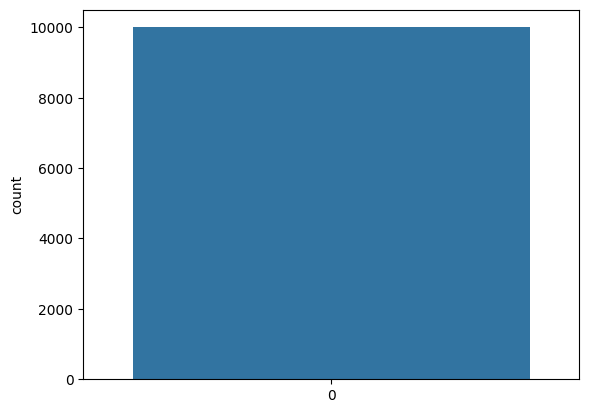

In [ ]:
sns.countplot(dataset['Exited'])

Separating labels and feature. Here 'Exited' is a label

In [ ]:
x=dataset.drop('Exited',axis=1)
y=dataset['Exited']

Handling the Imbalanced dataset

In [ ]:
x_res,y_res = SMOTE().fit_resample(x,y)
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Spliting The Dataset into The Training Set and Test Set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42)

Performing feature scaling

In [ ]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train


array([[ 0.16766464,  1.11447494, -1.76968123, ..., -0.57674603,
        -0.46225545, -0.84962009],
       [ 1.09547447,  0.10904994, -1.40067783, ..., -0.57674603,
        -0.46225545,  1.17699664],
       [-0.35627504,  0.91338994, -0.29366762, ..., -0.57674603,
        -0.46225545, -0.84962009],
       ...,
       [ 0.20041087,  0.20959244,  1.18234599, ..., -0.57674603,
        -0.46225545,  1.17699664],
       [-0.03972815,  0.31013494, -0.29366762, ..., -0.57674603,
        -0.46225545, -0.84962009],
       [ 0.52787316,  1.01393244, -1.40067783, ...,  1.73386542,
        -0.46225545,  1.17699664]])

## **Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

Model Evaluation

In [ ]:
prediction = rf.predict(x_test)
accuracy = accuracy_score(y_test,prediction)
print('Accuracy on Testing data : ', accuracy)

Accuracy on Testing data :  0.8559322033898306


In [ ]:
precision_score(y_test,prediction)

0.8488520408163265

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

finding the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1260  373]
 [ 311 1242]]


printing the accuracy

In [ ]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7853107344632768
